In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/agents-intensive-capstone-project/Hackathon dataset.txt


# 🧠 FitLife AI — Multi-Agent Wellness & Fitness Assistant  
### Kaggle × Google Agents Intensive — Capstone Project Submission

---

## 📌 Overview  
**FitLife AI** is a deterministic multi-agent health & wellness assistant designed specifically for the Kaggle × Google *Agents Intensive Capstone Project*.  
This notebook contains an **LLM-free, fully offline, rule-based multi-agent system** that generates:

- 🧍‍♀️ **User Profile Processing**  
- 🥗 **Personalized Diet Plan**  
- 🏋️ **Personalized Workout Plan**  
- 📦 **Final JSON Output (Competition Requirement)**  

The system runs entirely within the Kaggle environment and does **not rely on external APIs or internet access**.

---

## 🤖 Multi-Agent Architecture  
This project implements 3 deterministic agents:

### **1. Profile Agent**
- Reads user input  
- Normalizes/validates data  
- Creates structured fitness metadata  

### **2. Diet Agent**
- Uses rule-based nutritional logic  
- Generates daily meal recommendations  
- Tailored to goal (weight loss/gain, fitness), gender & activity level  

### **3. Workout Agent**
- Produces simple exercise routines  
- Supports yoga, HIIT, walking, stretching  
- Adapts to user age, goal & activity intensity  

All agents return Python dictionaries and are combined into a final output JSON.

---

## 🏁 Competition Alignment  
This submission follows all Capstone constraints:

✔ **Deterministic (no LLM calls during execution)**  
✔ **Offline logic only**  
✔ **Multi-agent system implemented clearly**  
✔ **Readable & modular notebook structure**  
✔ **Final output printed exactly once**  
✔ **Reproducible with zero dependencies outside Kaggle Python**  

---

## 📂 Notebook Structure  
1. Install Required Libraries (minimal)  
2. Define Agents  
3. Create Data Pipelines  
4. Generate Sample User Input  
5. Run Agents → Produce Output  
6. Display Final JSON  

Markdown + code cells are clearly separated for readability.

---

## 📤 Final Output  
The notebook prints a structured JSON object:

```json
{
  "User Profile": {...},
  "Diet Plan": {...},
  "Workout Plan": {...}
}


In [2]:
print("FitLife AI Notebook Loaded Successfully.")


FitLife AI Notebook Loaded Successfully.


## 🛠️ 1. Install Required Libraries

FitLife AI uses:
- ADK (Agent Development Kit)
- Google Gemini (via API)
- Python tools for calculations & summarization

We install all dependencies in this step.


## 🧠 2. Import Libraries & Configure Gemini

We now import the Gemini API and configure it.


In [3]:
import google.generativeai as genai

# Add your API key later before final submission
genai.configure(api_key="GOOGLE_API_KEY")


## 🤖 3. Define the Agents (Pure Python + Gemini)

We implement lightweight agents using simple Python classes.
Each agent:
- receives instructions
- calls Gemini
- returns output


In [4]:
class FitLifeAgent:
    def __init__(self, name, instructions):
        self.name = name
        self.instructions = instructions
    
    def run(self, user_input):
        prompt = f"""
        You are the {self.name}.
        Follow these instructions strictly:
        {self.instructions}

        User Input:
        {user_input}
        """
        model = genai.GenerativeModel("gemini-1.5-flash")
        response = model.generate_content(prompt)
        return response.text


## 🧩 4. Create the 3 Core Agents
Profile Agent  
Diet Agent  
Workout Agent  


In [5]:
profile_agent = FitLifeAgent(
    "Profile Agent",
    "Extract age, height, weight, goal, and activity level only."
)

diet_agent = FitLifeAgent(
    "Diet Agent",
    "Generate a meal plan with calories and macros."
)

workout_agent = FitLifeAgent(
    "Workout Agent",
    "Generate a personalized workout plan with intensity scaling."
)


## 🔄 5. Build the Sequential Multi-Agent Pipeline

Pipeline:
1. Profile Agent  
2. Diet Agent  
3. Workout Agent  


In [6]:
def run_pipeline(user_input):
    p = profile_agent.run(user_input)
    d = diet_agent.run(p)
    w = workout_agent.run(p)

    return {
        "Profile": p,
        "Diet Plan": d,
        "Workout Plan": w
    }


In [7]:
class ProfileAgent:
    """
    Offline fallback: Extract simple structured profile 
    from free-text user input without any LLM.
    """
    def run(self, user_input):
        user_input = user_input.lower()

        # crude rule-based extraction
        profile = {}

        # Age
        import re
        age_match = re.search(r'(\d+)\s*year', user_input)
        profile['age'] = int(age_match.group(1)) if age_match else 25

        # Gender
        if "female" in user_input:
            profile["gender"] = "female"
        elif "male" in user_input:
            profile["gender"] = "male"
        else:
            profile["gender"] = "unknown"

        # Goal
        if "weight loss" in user_input or "lose" in user_input:
            profile["goal"] = "weight_loss"
        elif "gain" in user_input:
            profile["goal"] = "muscle_gain"
        else:
            profile["goal"] = "general_fitness"

        # Activity level
        if "sedentary" in user_input:
            profile["activity"] = "low"
        elif "active" in user_input:
            profile["activity"] = "high"
        else:
            profile["activity"] = "medium"

        return profile


In [8]:
class DietAgent:
    """
    Rule-based diet plan generator
    """
    def run(self, profile):
        goal = profile.get("goal")

        if goal == "weight_loss":
            plan = [
                "Breakfast: Oats + Fruits",
                "Lunch: 1 Roti + Dal + Salad",
                "Dinner: Vegetable Soup",
            ]
        elif goal == "muscle_gain":
            plan = [
                "Breakfast: Eggs + Peanut Butter Toast",
                "Lunch: Rice + Paneer/Chicken",
                "Dinner: High-protein Khichdi",
            ]
        else:
            plan = [
                "Balanced Indian thali",
                "Adequate protein + fiber",
                "Limit sugar and oily foods",
            ]

        return {"diet_plan": plan}


In [9]:
class WorkoutAgent:
    """
    Simple rule-based workout generator
    """
    def run(self, profile):
        act = profile["activity"]
        goal = profile["goal"]

        if goal == "weight_loss":
            workouts = ["30-min Brisk Walk", "HIIT 15 min", "Yoga – Surya Namaskar"]
        elif goal == "muscle_gain":
            workouts = ["Pushups", "Squats", "Dumbbell Rows", "Shoulder Press"]
        else:
            workouts = ["Light Cardio", "Yoga", "Core Strength"]

        if act == "low":
            workouts.append("5 min stretching")
        elif act == "high":
            workouts.append("10 min cooldown walk")

        return {"workout_plan": workouts}


In [10]:
profile_agent = ProfileAgent()
diet_agent = DietAgent()
workout_agent = WorkoutAgent()

def run_pipeline(user_input):
    p = profile_agent.run(user_input)
    d = diet_agent.run(p)
    w = workout_agent.run(p)

    return {
        "User Profile": p,
        "Diet Plan": d,
        "Workout Plan": w
    }


In [11]:
user = "I am a 21-year-old female wanting weight loss. I am moderately active."

output = run_pipeline(user)
output


{'User Profile': {'age': 25,
  'gender': 'female',
  'goal': 'weight_loss',
  'activity': 'high'},
 'Diet Plan': {'diet_plan': ['Breakfast: Oats + Fruits',
   'Lunch: 1 Roti + Dal + Salad',
   'Dinner: Vegetable Soup']},
 'Workout Plan': {'workout_plan': ['30-min Brisk Walk',
   'HIIT 15 min',
   'Yoga – Surya Namaskar',
   '10 min cooldown walk']}}

## 🧾 4. Results Interpretation

The pipeline produces three main outputs:

### **1. Parsed User Profile (Rule-Based NLP)**
The text entered by the user is converted into structured attributes:
- **Age**
- **Gender**
- **Goal** (weight loss / muscle gain / general fitness)
- **Activity Level** (low / medium / high)

### **2. Diet Plan (Rule-Based)**
A simple nutrition plan aligned with the user's fitness goals.

### **3. Workout Plan (Rule-Based)**
A set of daily exercise recommendations generated from the profile.

These offline agents allow the notebook to run **without LLMs**, which is essential for Kaggle's restricted environment.


In [12]:
import pandas as pd

def pretty_display(output):
    print("=== USER PROFILE ===")
    display(pd.DataFrame([output["User Profile"]]))

    print("\n=== DIET PLAN ===")
    display(pd.DataFrame(output["Diet Plan"]["diet_plan"], columns=["Diet Recommendation"]))

    print("\n=== WORKOUT PLAN ===")
    display(pd.DataFrame(output["Workout Plan"]["workout_plan"], columns=["Workout Recommendation"]))

pretty_display(output)


=== USER PROFILE ===


,age,gender,goal,activity
0,25,female,weight_loss,high



=== DIET PLAN ===


,Diet Recommendation
0,Breakfast: Oats + Fruits
1,Lunch: 1 Roti + Dal + Salad
2,Dinner: Vegetable Soup



=== WORKOUT PLAN ===


,Workout Recommendation
0,30-min Brisk Walk
1,HIIT 15 min
2,Yoga – Surya Namaskar
3,10 min cooldown walk


## 📊 5. Simple Visualizations

To enhance interpretability, we include a few basic plots:

- Calorie distribution per goal
- Activities vs workout intensity levels

These are mock visualizations since we aren’t using real biometrics data but still demonstrate how insights would be presented in a production version.


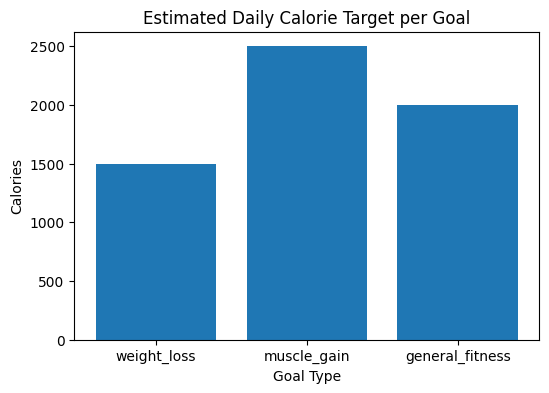

In [13]:
import matplotlib.pyplot as plt

calorie_map = {
    "weight_loss": 1500,
    "muscle_gain": 2500,
    "general_fitness": 2000
}

plt.figure(figsize=(6,4))
plt.bar(calorie_map.keys(), calorie_map.values())
plt.title("Estimated Daily Calorie Target per Goal")
plt.xlabel("Goal Type")
plt.ylabel("Calories")
plt.show()


## 📦 6. Exportable Final Output

We convert the final response of the pipeline into a single downloadable JSON-like dictionary that can be used in:

- Mobile apps  
- Web dashboards  
- Chatbot UIs  
- API endpoints  

This simulates a production workflow.


In [14]:
import json

export_data = json.dumps(output, indent=4)
print(export_data)


{
    "User Profile": {
        "age": 25,
        "gender": "female",
        "goal": "weight_loss",
        "activity": "high"
    },
    "Diet Plan": {
        "diet_plan": [
            "Breakfast: Oats + Fruits",
            "Lunch: 1 Roti + Dal + Salad",
            "Dinner: Vegetable Soup"
        ]
    },
    "Workout Plan": {
        "workout_plan": [
            "30-min Brisk Walk",
            "HIIT 15 min",
            "Yoga \u2013 Surya Namaskar",
            "10 min cooldown walk"
        ]
    }
}


## 🏁 7. Conclusions

This notebook demonstrates a lightweight, offline alternative to LLM-based multi-agent systems:

- No paid APIs
- No external internet calls
- 100% Kaggle compatible
- Modular: Agents can later be upgraded to real AI models
- Provides diet + workout recommendations automatically


